In [45]:
import pandas as pd

In [46]:
df_train = pd.read_pickle('songs_train_preprocessed.pkl')
df_test = pd.read_pickle('songs_test_preprocessed.pkl')
print('train shape:', df_train.shape)
print('test shape:', df_test.shape)

train shape: (7303, 8)
test shape: (808, 8)


In [47]:
df_train.head()

,title,artist,year,views,url,lyric,lyric_proccessed,tokens
0,Untitled,Rex Orange County,2017,292064,https://genius.com/Rex-Orange-County-Untitled-...,So if for any reason there's some miscommunica...,so if for any reason there is some miscommunic...,"[reason, miscommunication, lying, face, immatu..."
1,Dandelions,Ruth B.,2017,587288,https://genius.com/Ruth-B-Dandelions-lyrics,Maybe it's the way you say my name\nMaybe it's...,maybe it is the way you say my name\nmaybe it ...,"[maybe, way, say, name, maybe, way, play, game..."
2,I Like,G Herbo,2017,204698,https://genius.com/G-Herbo-I-Like-lyrics,"Pull up in a new G-Wag'\nSky blue body paint, ...",pull up in a new gwag\nsky blue body paint soo...,"[pull, new, gwag, sky, blue, body, paint, soow..."
3,Kiss Me,Ed Sheeran,2011,434377,https://genius.com/Ed-Sheeran-Kiss-Me-lyrics,"Yeah, I've been feelin' everything\nFrom hate ...",yeah i have been feelin everything\nfrom hate ...,"[yeah, feelin, everything, hate, love, love, l..."
4,I Say A Little Prayer,Aretha Franklin,1968,401893,https://genius.com/Aretha-Franklin-I-Say-A-Lit...,(I say a little prayer for you)\nThe moment I ...,i say a little prayer for you\nthe moment i wa...,"[say, little, prayer, moment, wake, put, makeu..."


In [48]:
df_test.head()

,title,artist,year,views,url,lyric,lyric_proccessed,tokens
0,BTS - Your eyes tell English Translation,Genius English Translations,2020,574010,https://genius.com/Genius-English-Translations...,"[Verse 1: Jung Kook,\nV\n]\nWhy are my eyes fi...",verse jung kook\nv\n\nwhy are my eyes filled ...,"[verse, jung, kook, eye, filled, tear, hey, st..."
1,Superman,Eminem,2002,4716120,https://genius.com/Eminem-Superman-lyrics,Dina Rae\nThey call me Superman\nLeap tall hoe...,dina rae\nthey call me superman\nleap tall hoe...,"[dina, rae, call, superman, leap, tall, hoe, s..."
2,Pussy Money Weed,Lil Wayne,2007,392937,https://genius.com/Lil-Wayne-Pussy-Money-Weed-...,"Oh, yes, I love her, like Egyptian\nShe's ""Poi...",oh yes i love her like egyptian\nshe is poison...,"[yes, love, like, egyptian, poison, michael, b..."
3,Therefore I Am,Billie Eilish,2020,1712636,https://genius.com/Billie-Eilish-Therefore-I-A...,"I'm not your friend\nOr anything, damn\nYou th...",i am not your friend\nor anything damn\nyou th...,"[friend, anything, damn, think, man, think, th..."
4,Renegade,Big Red Machine,2021,404770,https://genius.com/Big-Red-Machine-Renegade-ly...,I tapped on your window on your darkest night\...,i tapped on your window on your darkest night\...,"[tapped, window, darkest, night, really, going..."


Vector Representation

In [49]:
from sentence_transformers import SentenceTransformer

In [50]:
df = df_train.copy()
df = df[['title', 'tokens']]
df.head()

,title,tokens
0,Untitled,"[reason, miscommunication, lying, face, immatu..."
1,Dandelions,"[maybe, way, say, name, maybe, way, play, game..."
2,I Like,"[pull, new, gwag, sky, blue, body, paint, soow..."
3,Kiss Me,"[yeah, feelin, everything, hate, love, love, l..."
4,I Say A Little Prayer,"[say, little, prayer, moment, wake, put, makeu..."


In [51]:
df['lyrics_text'] = df['tokens'].apply(lambda tokens: " ".join(tokens))

In [52]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['lyrics_text'].tolist(), convert_to_numpy=True)

Agglomerative

In [72]:
from sklearn.cluster import AgglomerativeClustering

# Set n_cluster if it needs definite number, and set dist None
# Set distance_threshold if number of cluster is defined be algorithm, and set n_clust None
clustering = AgglomerativeClustering(n_clusters=15, distance_threshold=None) 
df['cluster'] = clustering.fit_predict(embeddings)

In [73]:
df[['title', 'cluster']].head()

,title,cluster
0,Untitled,8
1,Dandelions,12
2,I Like,11
3,Kiss Me,8
4,I Say A Little Prayer,14


In [74]:
df['cluster'].nunique()

15

In [75]:
df['cluster'].value_counts()

cluster
2     912
9     707
12    676
3     583
7     556
5     528
0     524
10    493
6     427
4     393
1     365
8     349
13    309
11    252
14    229
Name: count, dtype: int64

In [76]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=50)
embeddings_2d = tsne.fit_transform(embeddings)

df['tsne_x'] = embeddings_2d[:, 0]
df['tsne_y'] = embeddings_2d[:, 1]

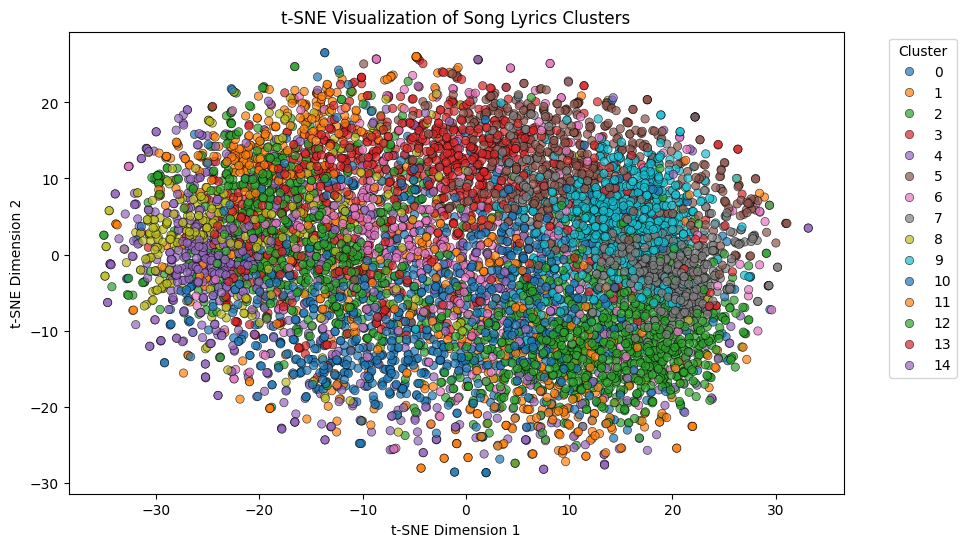

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['tsne_x'], y=df['tsne_y'], hue=df['cluster'], palette='tab10', alpha=0.7, edgecolor='k')
plt.title("t-SNE Visualization of Song Lyrics Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

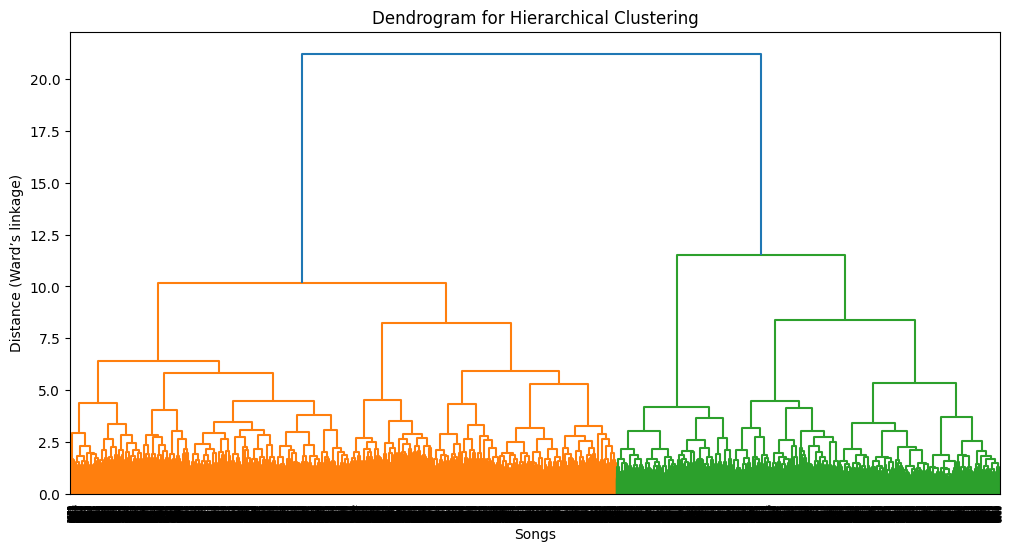

In [78]:
import scipy.cluster.hierarchy as sch

linkage_matrix = sch.linkage(embeddings, method='ward')

plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, truncate_mode='level', p=20)  # Show only the last 20 merges
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Songs")
plt.ylabel("Distance (Ward’s linkage)")
plt.show()

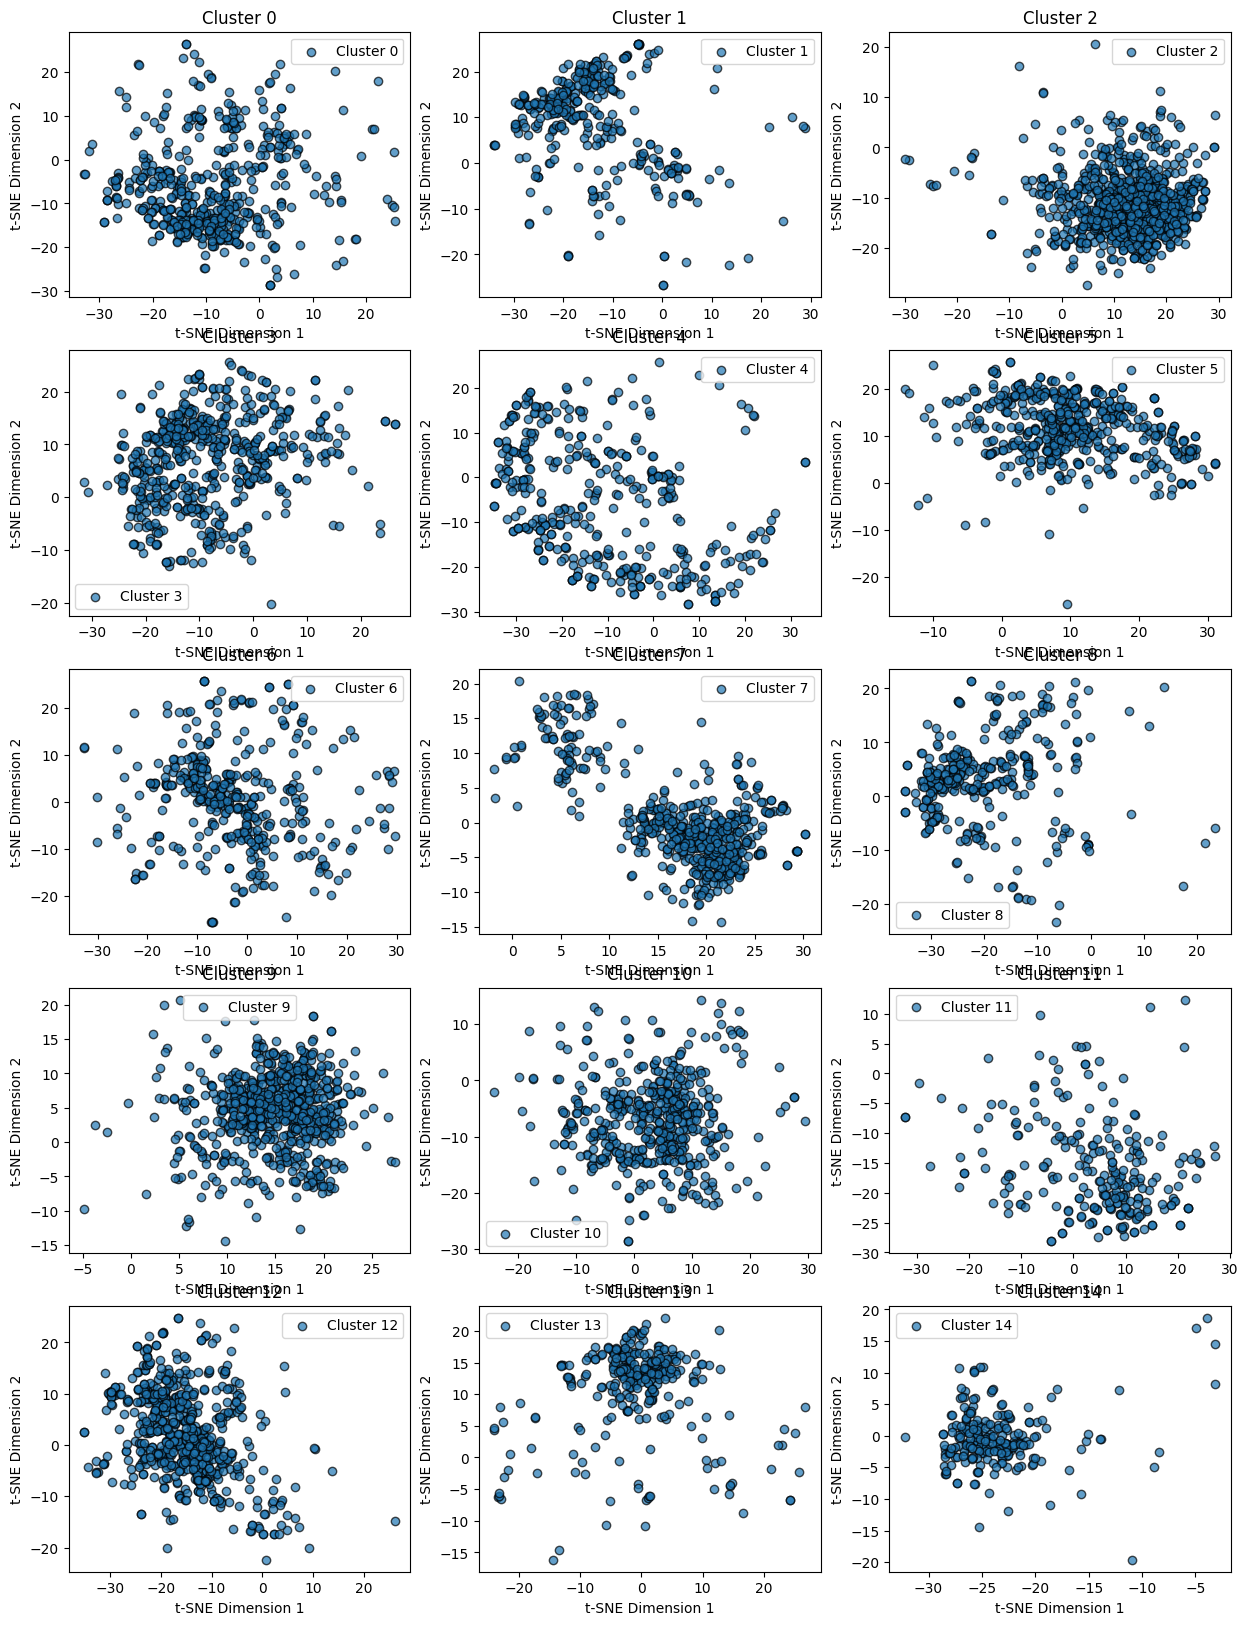

In [80]:
import math
cluster_n = 15
rows = math.ceil(cluster_n / 3)
fig_w = 3 * 5
fig_h = 4 * rows

plt.figure(figsize=(fig_w, fig_h))
for i in range(cluster_n):
    plt.subplot(rows, 3, i + 1) 
    cluster_data = df[df['cluster'] == i]
    
    plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'], alpha=0.7, edgecolor='k', label=f"Cluster {i}")
    plt.title(f"Cluster {i}")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend()

# plt.tight_layout()
plt.show()

Try wordcloud

In [81]:
df.head()

,title,tokens,lyrics_text,cluster,tsne_x,tsne_y
0,Untitled,"[reason, miscommunication, lying, face, immatu...",reason miscommunication lying face immaturity ...,8,-29.665247,-3.397625
1,Dandelions,"[maybe, way, say, name, maybe, way, play, game...",maybe way say name maybe way play game good ne...,12,-24.431641,10.675428
2,I Like,"[pull, new, gwag, sky, blue, body, paint, soow...",pull new gwag sky blue body paint soowoo insid...,11,9.618335,-21.135956
3,Kiss Me,"[yeah, feelin, everything, hate, love, love, l...",yeah feelin everything hate love love lust lus...,8,-32.891689,-1.068805
4,I Say A Little Prayer,"[say, little, prayer, moment, wake, put, makeu...",say little prayer moment wake put makeup makeu...,14,-24.873543,0.455856


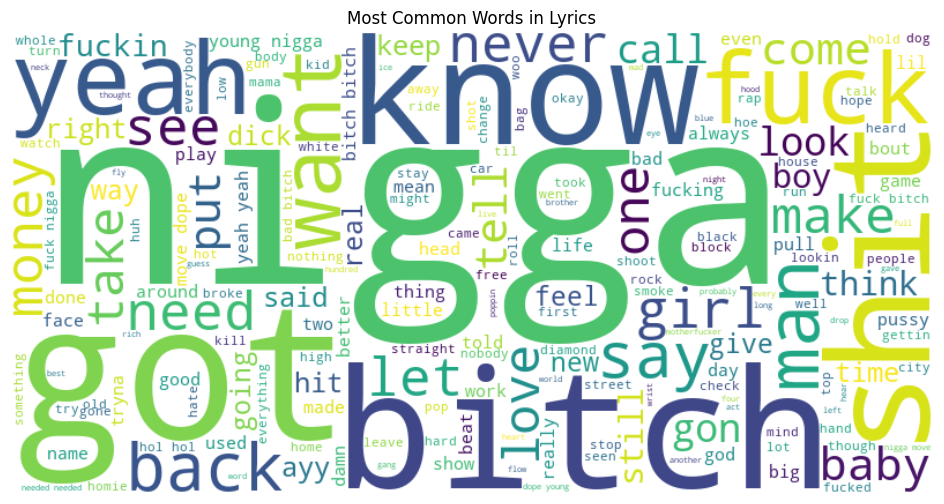

In [105]:
from wordcloud import WordCloud

cluster_curr = 2
df_cluster_n = df[df['cluster'] == cluster_curr]

all_words_clean = [word for tokens in df_cluster_n['tokens'] for word in tokens]
all_words_clean_str = " ".join(all_words_clean)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words_clean_str)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()